<a href="https://colab.research.google.com/github/manishmcsa/Assgnment9/blob/main/EVA4_Quizz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2021-02-06 05:38:17.927082


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Assignment9"

/content/drive/MyDrive/Assignment9


In [4]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

from data_load_with_albumentations import *
from quizzdnn import *
from results import plot_misclassified_images, plot_graph
from train import train
from test import test
from utils import *
from config import ModelConfig
from visualize import VisualizeCam

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# View model config
args = ModelConfig()
args.print_config()

print()
# Set seed
init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout_value': 0.15,
  'epochs': 40,
  'num_workers': 4,
  'seed': 1}

CUDA Available


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   car horse   dog


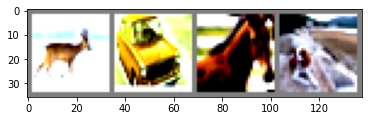

In [6]:
data = DataEngine(args)

# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

In [7]:
use_cuda = torch.cuda.is_available() # toc check is GPU is available
device = torch.device("cuda" if use_cuda else "cpu") # enable device to GPU if available otherwise CPU
#device = which_device()
model = QuizDNN().to(device)
show_model_summary(model, device, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4           [-1, 64, 32, 32]          36,928
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]          36,928
              ReLU-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
        MaxPool2d-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
           Conv2d-14           [-1, 64,

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

def run():
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch)
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs, misclassified_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs = run()

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.8021328449249268 Batch_id=781 Accuracy=40.83: 100%|██████████| 782/782 [00:25<00:00, 30.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0216, Accuracy: 5110/10000 (51.10%)

EPOCH: 2


Loss=0.7779067754745483 Batch_id=781 Accuracy=55.00: 100%|██████████| 782/782 [00:25<00:00, 30.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0184, Accuracy: 5773/10000 (57.73%)

EPOCH: 3


Loss=0.9400194883346558 Batch_id=781 Accuracy=60.62: 100%|██████████| 782/782 [00:26<00:00, 30.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0159, Accuracy: 6386/10000 (63.86%)

EPOCH: 4


Loss=0.6239157915115356 Batch_id=781 Accuracy=65.40: 100%|██████████| 782/782 [00:26<00:00, 29.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0161, Accuracy: 6344/10000 (63.44%)

EPOCH: 5


Loss=1.0778080224990845 Batch_id=781 Accuracy=68.55: 100%|██████████| 782/782 [00:26<00:00, 29.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0139, Accuracy: 6878/10000 (68.78%)

EPOCH: 6


Loss=0.4939717948436737 Batch_id=781 Accuracy=71.28: 100%|██████████| 782/782 [00:26<00:00, 29.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0126, Accuracy: 7183/10000 (71.83%)

EPOCH: 7


Loss=0.5719099640846252 Batch_id=781 Accuracy=73.49: 100%|██████████| 782/782 [00:26<00:00, 29.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0121, Accuracy: 7278/10000 (72.78%)

EPOCH: 8


Loss=0.6246010661125183 Batch_id=781 Accuracy=75.25: 100%|██████████| 782/782 [00:26<00:00, 29.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0116, Accuracy: 7458/10000 (74.58%)

EPOCH: 9


Loss=0.7608672976493835 Batch_id=781 Accuracy=77.05: 100%|██████████| 782/782 [00:26<00:00, 29.76it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0105, Accuracy: 7657/10000 (76.57%)

EPOCH: 10


Loss=0.45113998651504517 Batch_id=781 Accuracy=78.41: 100%|██████████| 782/782 [00:26<00:00, 29.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0099, Accuracy: 7806/10000 (78.06%)

EPOCH: 11


Loss=0.6254695653915405 Batch_id=781 Accuracy=79.63: 100%|██████████| 782/782 [00:26<00:00, 30.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 7798/10000 (77.98%)

EPOCH: 12


Loss=0.3645285367965698 Batch_id=781 Accuracy=80.58: 100%|██████████| 782/782 [00:26<00:00, 29.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0101, Accuracy: 7824/10000 (78.24%)

EPOCH: 13


Loss=1.19828462600708 Batch_id=781 Accuracy=81.21: 100%|██████████| 782/782 [00:25<00:00, 30.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 7888/10000 (78.88%)

EPOCH: 14


Loss=0.3941100537776947 Batch_id=781 Accuracy=82.29: 100%|██████████| 782/782 [00:26<00:00, 29.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 8072/10000 (80.72%)

EPOCH: 15


Loss=0.5581453442573547 Batch_id=781 Accuracy=83.00: 100%|██████████| 782/782 [00:26<00:00, 29.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0091, Accuracy: 7961/10000 (79.61%)

EPOCH: 16


Loss=0.9766850471496582 Batch_id=781 Accuracy=83.79: 100%|██████████| 782/782 [00:26<00:00, 29.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 8178/10000 (81.78%)

EPOCH: 17


Loss=0.4938551187515259 Batch_id=781 Accuracy=84.32: 100%|██████████| 782/782 [00:26<00:00, 29.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8304/10000 (83.04%)

EPOCH: 18


Loss=0.3976273834705353 Batch_id=781 Accuracy=84.73: 100%|██████████| 782/782 [00:26<00:00, 29.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 8320/10000 (83.20%)

EPOCH: 19


Loss=0.2607116997241974 Batch_id=781 Accuracy=84.96: 100%|██████████| 782/782 [00:26<00:00, 29.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 8212/10000 (82.12%)

EPOCH: 20


Loss=0.2209993302822113 Batch_id=781 Accuracy=85.60: 100%|██████████| 782/782 [00:26<00:00, 29.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 8402/10000 (84.02%)

EPOCH: 21


Loss=0.15710516273975372 Batch_id=781 Accuracy=86.06: 100%|██████████| 782/782 [00:26<00:00, 29.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 8352/10000 (83.52%)

EPOCH: 22


Loss=0.44651222229003906 Batch_id=781 Accuracy=86.52: 100%|██████████| 782/782 [00:26<00:00, 29.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 8227/10000 (82.27%)

EPOCH: 23


Loss=0.6185639500617981 Batch_id=781 Accuracy=87.00: 100%|██████████| 782/782 [00:26<00:00, 29.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8383/10000 (83.83%)

EPOCH: 24


Loss=0.5893775224685669 Batch_id=781 Accuracy=87.42: 100%|██████████| 782/782 [00:26<00:00, 29.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8417/10000 (84.17%)

EPOCH: 25


Loss=0.16490250825881958 Batch_id=781 Accuracy=87.69: 100%|██████████| 782/782 [00:26<00:00, 29.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 8485/10000 (84.85%)

EPOCH: 26


Loss=0.2384466975927353 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:26<00:00, 29.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0075, Accuracy: 8414/10000 (84.14%)

EPOCH: 27


Loss=0.5522599816322327 Batch_id=781 Accuracy=88.21: 100%|██████████| 782/782 [00:26<00:00, 29.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8420/10000 (84.20%)

EPOCH: 28


Loss=0.1451321244239807 Batch_id=781 Accuracy=88.49: 100%|██████████| 782/782 [00:26<00:00, 29.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8394/10000 (83.94%)

EPOCH: 29


Loss=0.1286543309688568 Batch_id=781 Accuracy=88.69: 100%|██████████| 782/782 [00:26<00:00, 29.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 86 %
Accuracy of   car : 93 %
Accuracy of  bird : 82 %
Accuracy of   cat : 53 %
Accuracy of  deer : 86 %
Accuracy of   dog : 91 %
Accuracy of  frog : 91 %
Accuracy of horse : 91 %
Accuracy of  ship : 92 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0069, Accuracy: 8535/10000 (85.35%)

EPOCH: 30


Loss=0.34329482913017273 Batch_id=781 Accuracy=88.64: 100%|██████████| 782/782 [00:27<00:00, 28.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 91 %
Accuracy of  bird : 75 %
Accuracy of   cat : 67 %
Accuracy of  deer : 85 %
Accuracy of   dog : 87 %
Accuracy of  frog : 93 %
Accuracy of horse : 87 %
Accuracy of  ship : 85 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0067, Accuracy: 8542/10000 (85.42%)

EPOCH: 31


Loss=0.8887048959732056 Batch_id=781 Accuracy=89.33: 100%|██████████| 782/782 [00:26<00:00, 29.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 98 %
Accuracy of  bird : 69 %
Accuracy of   cat : 74 %
Accuracy of  deer : 79 %
Accuracy of   dog : 70 %
Accuracy of  frog : 84 %
Accuracy of horse : 97 %
Accuracy of  ship : 87 %
Accuracy of truck : 84 %

Test set: Average loss: 0.0067, Accuracy: 8553/10000 (85.53%)

EPOCH: 32


Loss=0.41842105984687805 Batch_id=781 Accuracy=89.28: 100%|██████████| 782/782 [00:26<00:00, 29.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 83 %
Accuracy of   car : 91 %
Accuracy of  bird : 80 %
Accuracy of   cat : 84 %
Accuracy of  deer : 93 %
Accuracy of   dog : 75 %
Accuracy of  frog : 86 %
Accuracy of horse : 82 %
Accuracy of  ship : 88 %
Accuracy of truck : 85 %

Test set: Average loss: 0.0066, Accuracy: 8544/10000 (85.44%)

EPOCH: 33


Loss=0.9519113302230835 Batch_id=781 Accuracy=89.68: 100%|██████████| 782/782 [00:26<00:00, 29.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 8423/10000 (84.23%)

EPOCH: 34


Loss=0.6440446376800537 Batch_id=781 Accuracy=89.86: 100%|██████████| 782/782 [00:26<00:00, 29.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 84 %
Accuracy of   car : 94 %
Accuracy of  bird : 89 %
Accuracy of   cat : 68 %
Accuracy of  deer : 83 %
Accuracy of   dog : 72 %
Accuracy of  frog : 86 %
Accuracy of horse : 94 %
Accuracy of  ship : 100 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0065, Accuracy: 8587/10000 (85.87%)

EPOCH: 35


Loss=0.25351008772850037 Batch_id=781 Accuracy=90.00: 100%|██████████| 782/782 [00:27<00:00, 28.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 91 %
Accuracy of   car : 84 %
Accuracy of  bird : 75 %
Accuracy of   cat : 68 %
Accuracy of  deer : 86 %
Accuracy of   dog : 72 %
Accuracy of  frog : 94 %
Accuracy of horse : 92 %
Accuracy of  ship : 86 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0069, Accuracy: 8548/10000 (85.48%)

EPOCH: 36


Loss=0.2986466884613037 Batch_id=781 Accuracy=90.18: 100%|██████████| 782/782 [00:27<00:00, 28.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 93 %
Accuracy of  bird : 77 %
Accuracy of   cat : 81 %
Accuracy of  deer : 82 %
Accuracy of   dog : 64 %
Accuracy of  frog : 83 %
Accuracy of horse : 95 %
Accuracy of  ship : 94 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0065, Accuracy: 8620/10000 (86.20%)

EPOCH: 37


Loss=0.24584133923053741 Batch_id=781 Accuracy=90.54: 100%|██████████| 782/782 [00:27<00:00, 28.93it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 91 %
Accuracy of  bird : 77 %
Accuracy of   cat : 77 %
Accuracy of  deer : 84 %
Accuracy of   dog : 80 %
Accuracy of  frog : 91 %
Accuracy of horse : 80 %
Accuracy of  ship : 92 %
Accuracy of truck : 97 %

Test set: Average loss: 0.0066, Accuracy: 8562/10000 (85.62%)

EPOCH: 38


Loss=0.33572953939437866 Batch_id=781 Accuracy=90.60: 100%|██████████| 782/782 [00:26<00:00, 29.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 96 %
Accuracy of  bird : 81 %
Accuracy of   cat : 69 %
Accuracy of  deer : 91 %
Accuracy of   dog : 73 %
Accuracy of  frog : 88 %
Accuracy of horse : 82 %
Accuracy of  ship : 90 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0063, Accuracy: 8640/10000 (86.40%)

EPOCH: 39


Loss=0.5547859072685242 Batch_id=781 Accuracy=90.97: 100%|██████████| 782/782 [00:26<00:00, 29.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 81 %
Accuracy of   car : 98 %
Accuracy of  bird : 91 %
Accuracy of   cat : 69 %
Accuracy of  deer : 83 %
Accuracy of   dog : 84 %
Accuracy of  frog : 86 %
Accuracy of horse : 95 %
Accuracy of  ship : 95 %
Accuracy of truck : 83 %

Test set: Average loss: 0.0068, Accuracy: 8565/10000 (85.65%)

EPOCH: 40


Loss=0.6917393207550049 Batch_id=781 Accuracy=90.84: 100%|██████████| 782/782 [00:26<00:00, 29.03it/s]
/content/drive/My Drive/Assignment9/test.py:24: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct==0).nonzero()[:,0]



Accuracy of plane : 89 %
Accuracy of   car : 89 %
Accuracy of  bird : 75 %
Accuracy of   cat : 68 %
Accuracy of  deer : 93 %
Accuracy of   dog : 76 %
Accuracy of  frog : 79 %
Accuracy of horse : 92 %
Accuracy of  ship : 95 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0067, Accuracy: 8606/10000 (86.06%)

